<a href="https://colab.research.google.com/github/ArnaudGardille/Deep-Learning-Signal/blob/main/dls_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning et traitement du signal TP 1 

Listez les noms des étudiants (3 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom, affectation).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb 

Installez les paquets nécessaires à la réalisation de ce TP
<br> 
Vous pouvez utiliser dans le notebook 
!pip install \<nom_du_paquet\>
    


In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import librosa 
#import IPython.display as ipd
from pathlib import Path


In [54]:
path = Path.cwd()

## Partie 1: Audio 

### Visualisation

 Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec librosa.open et écoutez le dans le notebook avec IPython.display.Audio


In [55]:
path_audio = path / "lalala.wav"
(rec,y) = librosa.load(path_audio)
rec,y

(array([0.        , 0.        , 0.        , ..., 0.00765991, 0.00717163,
        0.0067749 ], dtype=float32),
 22050)

In [56]:
len(rec)/y

2.972154195011338

In [57]:
rec = np.array(rec)

In [58]:
from IPython.display import Audio 
Audio(path_audio, autoplay=True)

Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 

Text(0.5, 0, 'temps (s)')

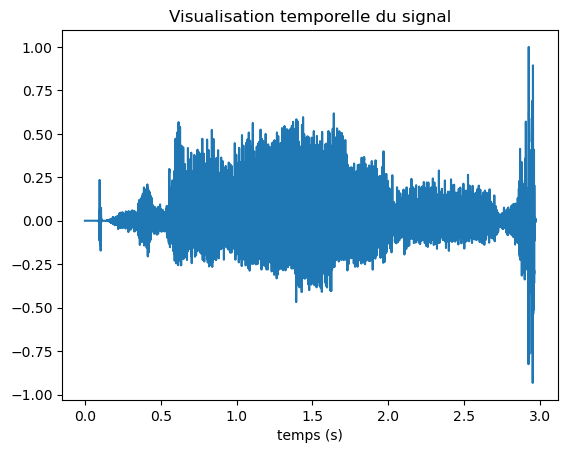

In [59]:
t = np.arange(len(rec))/y
plt.plot(t, rec)
plt.title("Visualisation temporelle du signal")
plt.xlabel("temps (s)")

In [60]:
freq,powerDen= scipy.signal.welch(rec, y, 'flattop', 1024, scaling='spectrum')

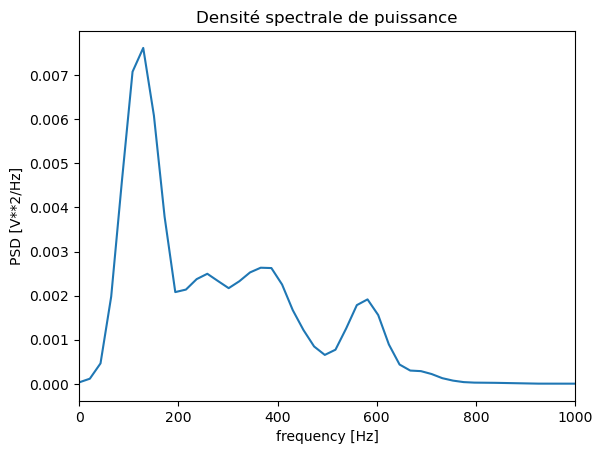

In [61]:
plt.plot(freq, powerDen)
plt.title('Densité spectrale de puissance')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(xmin=0, xmax=1000)
plt.show()

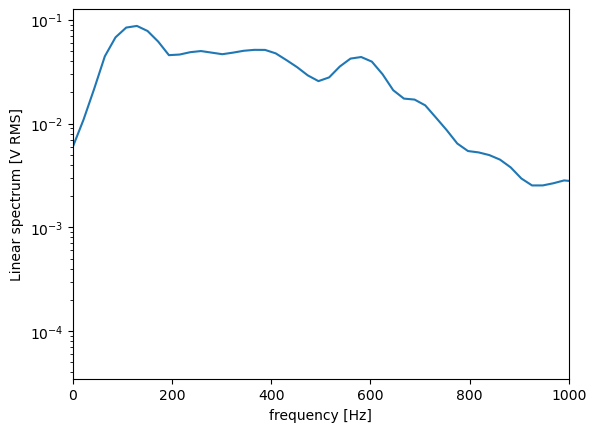

In [62]:
f, Pxx_spec = scipy.signal.welch(rec, y, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.xlim(xmin=0, xmax=1000)
plt.show()

Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.

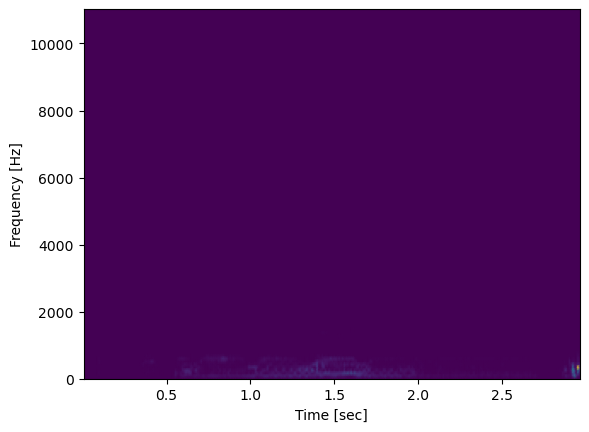

In [63]:
f, t, Sxx = scipy.signal.spectrogram(rec, y)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

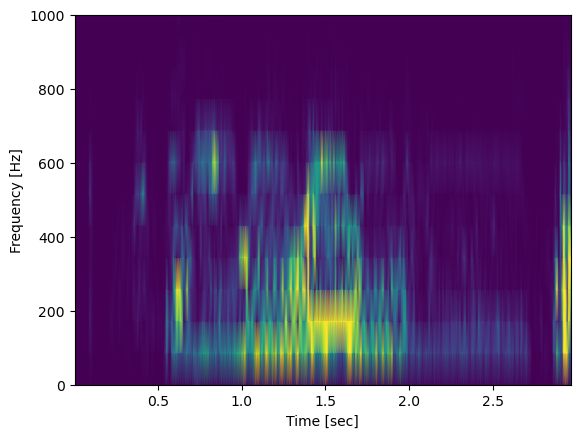

In [64]:
plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.show()

### Rééchantillonnage

Nous allons procéder de deux façons pour sous-échantillonner votre signal d'un facteur 2: 
- Supprimez un point sur deux: signal -> signal_reech_1
- Utilisez la fonction librosa.resample: signal -> signal_reech_2

Ecoutez les deux résultats dans le notebook et affichez le spectrogramme de (signal_reech_1 - signal) et (signal_reech_2 - signal). 

Les deux méthodes de rééchantillonnage sont elles équivalentes ? Interprétez les éventuelles différences

In [78]:
facteur_sous_ech = 6

In [79]:
rec.shape

(65536,)

In [80]:
np.repeat(rec,facteur_sous_ech).shape

(393216,)

In [81]:
signal_reech_1 = rec[::facteur_sous_ech]
Audio(signal_reech_1, autoplay=True, rate=y/facteur_sous_ech)

In [86]:
test = np.repeat(signal_reech_1,facteur_sous_ech)
Audio(test, autoplay=True, rate=y)

In [85]:
test.shape

(65538,)

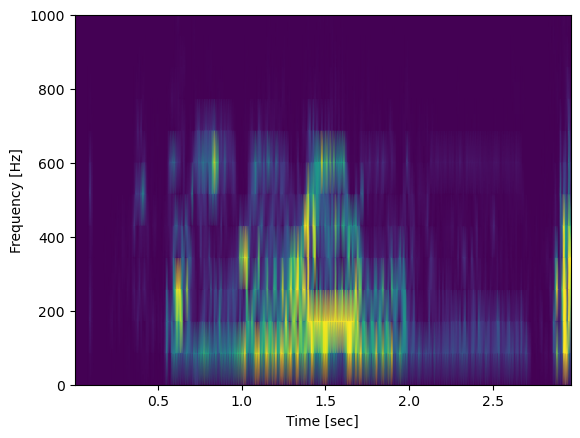

In [88]:
f, t, Sxx = scipy.signal.spectrogram(test, y)
plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.show()

In [ ]:
n = min(len(rec) - np.repeat(signal_reech_1,facteur_sous_ech)

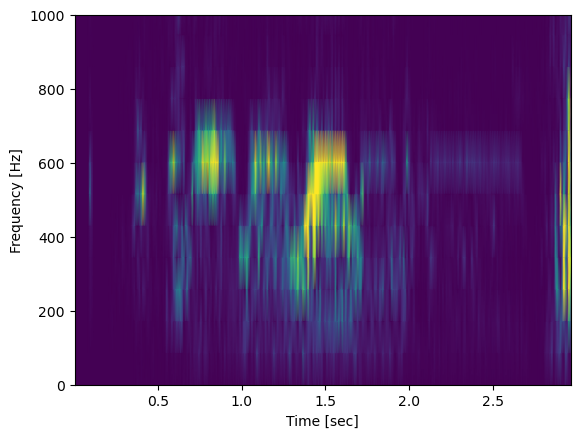

In [87]:
f, t, Sxx = scipy.signal.spectrogram(rec - np.repeat(signal_reech_1,facteur_sous_ech)[:len(rec)], y)
plt.pcolormesh(t, f,Sxx, shading='gouraud', vmax=Sxx.max() / 10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax=1000) #or yl
plt.show()

In [ ]:
signal_reech_2 = librosa.resample(rec, y, y/facteur_sous_ech)
Audio(signal_reech_2, autoplay=True, rate=y/facteur_sous_ech)

/var/folders/bs/0f5dcrc501sf9wtpqltg62940000gn/T/ipykernel_65376/350742905.py:1: FutureWarning: Pass orig_sr=22050, target_sr=2205.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  signal_reech_2 = librosa.resample(rec, y, y/facteur_sous_ech)


### Calcul du Pitch

Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix.

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.

In [ ]:
Sxx.shape

(129, 292)

In [ ]:
t.shape

(292,)

In [ ]:
f

array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
         344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
         689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
        1033.59375  ,  1119.7265625,  1205.859375 ,  1291.9921875,
        1378.125    ,  1464.2578125,  1550.390625 ,  1636.5234375,
        1722.65625  ,  1808.7890625,  1894.921875 ,  1981.0546875,
        2067.1875   ,  2153.3203125,  2239.453125 ,  2325.5859375,
        2411.71875  ,  2497.8515625,  2583.984375 ,  2670.1171875,
        2756.25     ,  2842.3828125,  2928.515625 ,  3014.6484375,
        3100.78125  ,  3186.9140625,  3273.046875 ,  3359.1796875,
        3445.3125   ,  3531.4453125,  3617.578125 ,  3703.7109375,
        3789.84375  ,  3875.9765625,  3962.109375 ,  4048.2421875,
        4134.375    ,  4220.5078125,  4306.640625 ,  4392.7734375,
        4478.90625  ,  4565.0390625,  4651.171875 ,  4737.3046875,
        4823.4375   ,  4909.5703125,  4995.703125 ,  5081.8359

In [ ]:
Sxx[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.62430402e-09, 5.43622285e-08, 3.76613096e-09, 8.54662313e-11,
       7.51467726e-16, 5.46216447e-13, 3.06130364e-11, 7.06461056e-10,
       3.56978958e-09, 2.32402186e-09, 8.46813897e-10, 8.34817993e-09,
       4.33716032e-08, 1.64998522e-08, 2.93618269e-10, 7.99968869e-10,
       2.32712383e-09, 1.04714806e-08, 2.02382004e-08, 1.48954991e-08,
       4.51009257e-08, 6.30828767e-09, 9.95960470e-09, 1.08894312e-07,
       2.52807286e-09, 1.60253533e-09, 6.24603969e-09, 3.44072362e-07,
       2.56507811e-08, 1.86035209e-07, 6.44854055e-08, 9.38795210e-08,
       2.65551758e-08, 8.80493417e-07, 1.31544455e-08, 6.58180488e-09,
       4.80710511e-08, 3.65979389e-07, 5.39081277e-08, 1.75634778e-08,
       4.77601247e-08, 1.09872957e-07, 1.79483788e-08, 3.67741890e-08,
       6.85279602e-08, 2.47303603e-07, 3.31876663e-07, 1.29778402e-06,
      

In [ ]:
a = np.sort(Sxx)
a

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.7527384e-06,
        7.8040584e-06, 1.2312781e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.9005868e-04,
        2.0010897e-04, 5.0085894e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0585870e-04,
        3.1796697e-04, 3.3840520e-04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.9410782e-09,
        1.0039476e-08, 1.0075653e-08],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.7696362e-09,
        4.3565311e-09, 5.9376490e-09],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1246815e-09,
        1.1757652e-09, 1.2073919e-09]], dtype=float32)

In [ ]:
np.sort(Sxx)[:50].mean()

4.074074e-06

## Partie 2: Détection d'impulsion

Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 

Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 



In [ ]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['signaux']
labels = donnees['labels']

FileNotFoundError: [Errno 2] No such file or directory: 'signaux_impulsions.npz'

Proposez une méthode (simple) pour décider si un signal contient une impulsion ou non. Cette méthode fera intervenir un seuil. 
Utilisez votre méthode sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 

Nous allons comparer vos résultats aux résultats idéaux consignés dans le tableau labels. 

Calculez le nombre de signaux pour lesquels votre résultat concorde avec le résultat idéal. 



La précision est définie comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux décidés positifs par votre méthode)

et le rappel comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux réellement positifs)

Faites varier le seuil et enregistrez pour ses différentes valeurs la précision et le rappel de votre méthode. Affichez dans le plan (précision , rappel) les points de fonctionnement de votre méthode. Commentez le résultat. 